#### Imports 

In [4]:

import pandas as pd
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import  requests


## Broswer Automation with Selenium

In [ ]:
driver = webdriver.Chrome()
driver.get("https://nigeriapropertycentre.com/")

time.sleep(2)
driver.find_element(By.ID,"li-cid-for-rent").click()

time.sleep(2)

saletype = driver.find_element(By.NAME, "tid")
saletype.click()

time.sleep(2)

dropdown = Select(saletype)
dropdown.select_by_visible_text('House')

time.sleep(2)

min_price = driver.find_element(By.NAME,"minprice")
min_price.click()

time.sleep(2)

dropdown_2 = Select(min_price)
dropdown_2.select_by_visible_text('₦ 500,000')

max_price = driver.find_element(By.NAME,"maxprice")
max_price.click()

time.sleep(2)

dropdown_3 = Select(max_price)
dropdown_3.select_by_visible_text('₦ 150 Million')

time.sleep(2)

auto = driver.find_element(By.CLASS_NAME,"form-control").send_keys('Victoria Island (VI), Lagos') 

submit = driver.find_element(By.XPATH,"//button[@type = 'submit']")
submit.click()

time.sleep(2)


current_url = driver.current_url



### Data Extraction With Beautiful Soup 

In [5]:
current_url = 'https://nigeriapropertycentre.com/for-rent/houses/lagos/victoria-island?minprice=500000&maxprice=150000000&selectedLoc=1&q=for-rent+houses+lagos+victoria-island+minprice+500000+maxprice+150000000'

In [6]:
 headers = { 'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36',
'Accept': '*/*', 
'Accept-Language': 'en-US,en;q=0.9', 
'Referer': 'https://nigeriapropertycentre.com/', 
'Cache-Control': 'max-age=0' }

In [7]:
response = requests.get(current_url,headers=headers)

In [8]:
## Status code 

response.status_code

200

In [9]:
soup = BeautifulSoup(response.content, 'html.parser')

In [11]:
list_items = soup.find_all('div',{'itemprop':'itemListElement' })

In [12]:
len(list_items)

20

#### Data i want to extract

- price
- bedrooms
- bathrooms
- toilets
- parkingspace
- housetype

In [14]:
# price

list_items[0].find('span',{'class':'pull-sm-left'}).get_text().replace('₦', '').replace('per annum','').strip().replace(',','')

'12000000'

In [15]:
# bedrooms
list_items[0].find('ul',{'class':'aux-info'}).find('span').get_text()

'4'

In [16]:
#house properties

list_items[0].find('div',{'class':'wp-block-footer'}).get_text().strip()#.replace(' Bathrooms4 Toilets3 Parking Spaces Save','').replace('4 Bedrooms','').strip()

'4 Bedrooms4 Bathrooms5 Toilets Save'

In [19]:
#houseType

list_items[0].find('h4').get_text() 

'4 bedroom terraced duplex for rent'

In [20]:
# list comprehension

price = [result.find('span',{'class':'pull-sm-left'}).get_text().replace('₦', '').replace('per annum','').strip().replace(',','') for result in list_items]
house_properties = [result.find('div',{'class':'wp-block-footer'}).get_text().strip() for result in list_items]
house_type  = [result.find('h4').get_text() for result in list_items]

In [21]:
data = {
    'Price': price,
    'HouseProperties': house_properties,
    'HouseType': house_type
   
}


In [22]:
df = pd.DataFrame(data)

In [23]:
df

,Price,HouseProperties,HouseType
0,12000000,4 Bedrooms4 Bathrooms5 Toilets Save,4 bedroom terraced duplex for rent
1,25000000,4 Bedrooms4 Bathrooms5 Toilets3 Parking Spaces...,4 bedroom terraced duplex for rent
2,30000000,5 Bedrooms5 Bathrooms6 Toilets Save,5 bedroom detached duplex for rent
3,12000000,4 Bedrooms4 Bathrooms5 Toilets Save,4 bedroom semi-detached duplex for rent
4,12000000,4 Bedrooms4 Bathrooms5 Toilets2 Parking Spaces...,4 bedroom terraced duplex for rent
5,10000000,4 Bedrooms4 Bathrooms5 Toilets4 Parking Spaces...,4 bedroom house for rent
6,10000000,4 Bedrooms4 Bathrooms5 Toilets3 Parking Spaces...,4 bedroom terraced duplex for rent
7,12000000,4 Bedrooms4 Bathrooms5 Toilets Save,4 bedroom terraced duplex for rent
8,10000000,3 Bedrooms3 Bathrooms4 Toilets2 Parking Spaces...,3 bedroom house for rent
9,20000000,5 Bedrooms5 Bathrooms6 Toilets3 Parking Spaces...,5 bedroom semi-detached duplex for rent


###  Obtaining data from multiple pages 

In [24]:

prices = []
house_properties = []
house_types = []

# scraping through the each pages 
for page in range(1,500):
    response = requests.get(current_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    list_items = soup.find_all('div',{'itemprop':'itemListElement' })

    # Extracting  data from each listing
    for result in list_items:
        price = result.find('span', {'class': 'pull-sm-left'}).get_text().replace('₦', '').replace('per annum', '').strip().replace(',', '')
        house_property = result.find('div', {'class': 'wp-block-footer'}).get_text().strip()
        house_type = result.find('h4').get_text()

        prices.append(price)
        house_properties.append(house_property)
        house_types.append(house_type)
    



In [26]:
data = {
    'Price': prices,
    'House Properties': house_properties,
    'House Type': house_types
    
}

In [27]:
df = pd.DataFrame(data)

In [28]:
df

,Price,House Properties,House Type
0,12000000,4 Bedrooms4 Bathrooms5 Toilets Save,4 bedroom terraced duplex for rent
1,25000000,4 Bedrooms4 Bathrooms5 Toilets3 Parking Spaces...,4 bedroom terraced duplex for rent
2,30000000,5 Bedrooms5 Bathrooms6 Toilets Save,5 bedroom detached duplex for rent
3,12000000,4 Bedrooms4 Bathrooms5 Toilets Save,4 bedroom semi-detached duplex for rent
4,12000000,4 Bedrooms4 Bathrooms5 Toilets2 Parking Spaces...,4 bedroom terraced duplex for rent
...,...,...,...
9975,6000000,3 Bedrooms3 Bathrooms4 Toilets3 Parking Spaces...,3 bedroom terraced duplex for rent
9976,12000000,4 Bedrooms4 Bathrooms5 Toilets Save,4 bedroom terraced duplex for rent
9977,12000000,4 Bedrooms Save,4 bedroom terraced duplex for rent
9978,6000000,3 Bedrooms3 Bathrooms4 Toilets3 Parking Spaces...,3 bedroom terraced duplex for rent


#### Now extract the following data

- Bedrooms
- Bathrooms
- Toilets
- parking space
- house type


### Looking for keywords

In [30]:
keywords = ['terraced','terrace' ,'semi-detached','detached','semi detached']

# Function to check if any keyword is present in the location
def check_houseType(House_Type):
    for keyword in keywords:
        if keyword.lower() in House_Type.lower():
            return keyword
    return 'apartment'

# Apply the function to the 'House type' column
df['HouseType'] = df['House Type'].apply(check_houseType)

In [31]:
df = df.drop('House Type',axis = 1)

In [32]:
df

,Price,House Properties,HouseType
0,12000000,4 Bedrooms4 Bathrooms5 Toilets Save,terraced
1,25000000,4 Bedrooms4 Bathrooms5 Toilets3 Parking Spaces...,terraced
2,30000000,5 Bedrooms5 Bathrooms6 Toilets Save,detached
3,12000000,4 Bedrooms4 Bathrooms5 Toilets Save,semi-detached
4,12000000,4 Bedrooms4 Bathrooms5 Toilets2 Parking Spaces...,terraced
...,...,...,...
9975,6000000,3 Bedrooms3 Bathrooms4 Toilets3 Parking Spaces...,terraced
9976,12000000,4 Bedrooms4 Bathrooms5 Toilets Save,terraced
9977,12000000,4 Bedrooms Save,terraced
9978,6000000,3 Bedrooms3 Bathrooms4 Toilets3 Parking Spaces...,terraced


In [33]:
import re

def extract_property_details(properties):
    bedrooms = re.search(r'(\d+) Bedrooms', properties)
    bathrooms = re.search(r'(\d+) Bathrooms', properties)
    toilets = re.search(r'(\d+) Toilets', properties)
    parking_spaces = re.search(r'(\d+) Parking Space', properties) or re.search(r'(\d+) Parking Spaces', properties)
    
    return {
        'Bedrooms': int(bedrooms.group(1)) if bedrooms else None,
        'Bathrooms': int(bathrooms.group(1)) if bathrooms else None,
        'Toilets': int(toilets.group(1)) if toilets else None,
        'Parking Spaces': int(parking_spaces.group(1)) if parking_spaces else None
    }

# Apply the function to the 'House Properties' column
property_details = df['House Properties'].apply(extract_property_details).apply(pd.Series)



In [34]:
df = pd.concat([df, property_details], axis=1)

In [35]:
df = df.drop('House Properties',axis = 1)

In [36]:
df

,Price,HouseType,Bedrooms,Bathrooms,Toilets,Parking Spaces
0,12000000,terraced,4.0,4.0,5.0,NaN
1,25000000,terraced,4.0,4.0,5.0,3.0
2,30000000,detached,5.0,5.0,6.0,NaN
3,12000000,semi-detached,4.0,4.0,5.0,NaN
4,12000000,terraced,4.0,4.0,5.0,2.0
...,...,...,...,...,...,...
9975,6000000,terraced,3.0,3.0,4.0,3.0
9976,12000000,terraced,4.0,4.0,5.0,NaN
9977,12000000,terraced,4.0,NaN,NaN,NaN
9978,6000000,terraced,3.0,3.0,4.0,3.0


In [37]:
df_scraped = df.copy()

In [38]:
## Saving my data as csv file


df_scraped.to_csv('/Users/sot/Documents/New_Lagos_real_estate_data.csv',index= False)

## DATASET importation, exploration and preparation 

In [1]:
# impport revelant liberies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter(action= 'ignore')

In [2]:
data = pd.read_csv(r'/Users/sot/Documents/New_Lagos_real_estate_data.csv')
data

,Price,HouseType,Bedrooms,Bathrooms,Toilets,Parking Spaces
0,12000000,terraced,4.0,4.0,5.0,NaN
1,25000000,terraced,4.0,4.0,5.0,3.0
2,30000000,detached,5.0,5.0,6.0,NaN
3,12000000,semi-detached,4.0,4.0,5.0,NaN
4,12000000,terraced,4.0,4.0,5.0,2.0
...,...,...,...,...,...,...
9975,6000000,terraced,3.0,3.0,4.0,3.0
9976,12000000,terraced,4.0,4.0,5.0,NaN
9977,12000000,terraced,4.0,NaN,NaN,NaN
9978,6000000,terraced,3.0,3.0,4.0,3.0


In [3]:
data['HouseType'].unique()

array(['terraced', 'detached', 'semi-detached', 'apartment'], dtype=object)

# SECTION 1 :  Exploratory Data Analysis

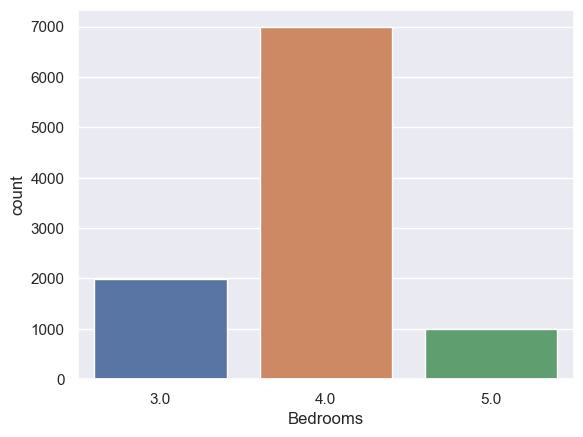

In [4]:
#Observing the bedroom column. it's  evident that most of the houses in our observations(points) have 4 and 5 bedrooms respectively 

sns.countplot(data = data, x = 'Bedrooms');

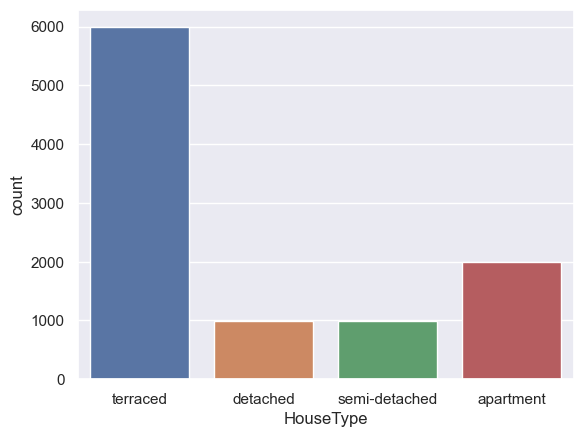

In [5]:
##looking at the property type column. it's evident that most of the observations are either fully detached buildings or terraced buildings

sns.countplot(data = data, x = 'HouseType');

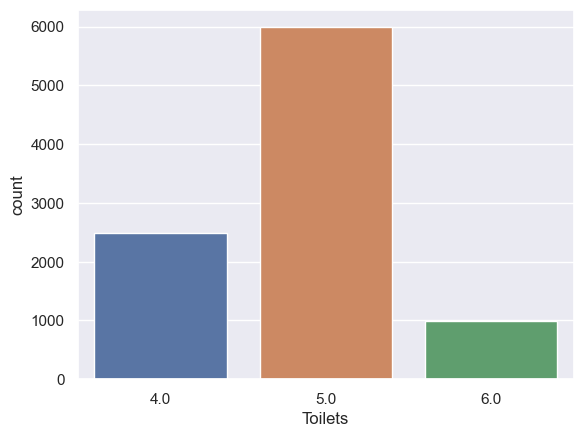

In [6]:
sns.countplot(data = data, x = 'Toilets');

##### Observing the points of toilets in our data; it is evident that most houses have 4 to 5 toilets which makes lot of  sense given that our houses with highest bedrooms is between 3 and 4 . Due to my domain knowledge of these observations i would say  that most houses that have 4 bedrooms would likely have 5 toilets i.e one toilet in each room and a single visitor's toilet for the guest and it goes on and on for rest houses with  3,5 bedrooms. 

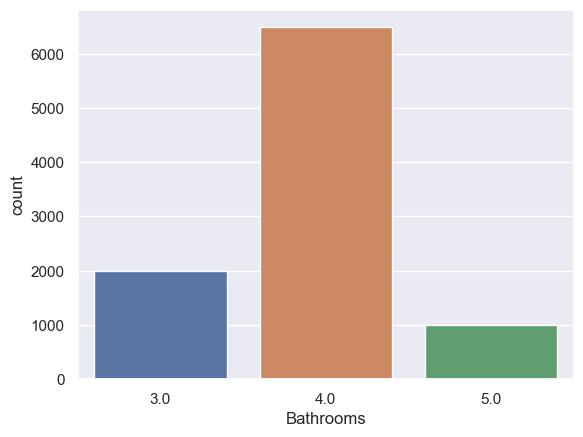

In [7]:


sns.countplot(data = data, x = 'Bathrooms');

####   This is becoming interesting, from the observations most houses have 4 bedrooms and it makes sense that most bathrooms are 4. It's evident that  the 4 bedrooms have a bathroom each. With my domain knowledge, i honestly doubt  there will be a bathroom for guest given that before a guest  would decide to shower at your house then that guest is more likely to be a family friend or close relative  who can possibly make use of one of the bathrooms in the bedroom. 

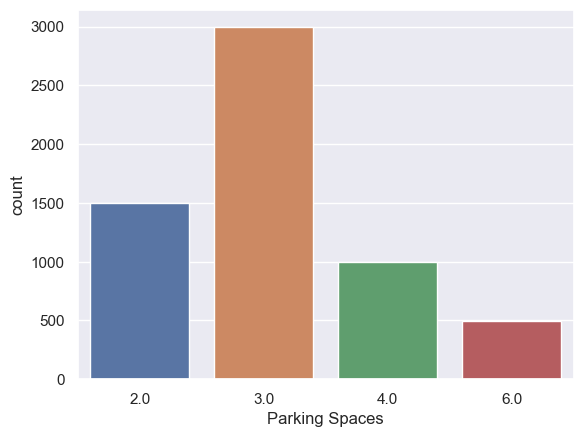

In [8]:
sns.countplot(data = data, x = 'Parking Spaces');

#### Observing the parking space column,  we could see that most houses have 2 to 3 packing spaces. It makes sense right? YES, it does makes sense. I honestly doubt if a simple family would have more than 3 cars parked given that most of the houses are built for simple families. Hence, having  6  parking spaces for a house built for simple families doesnt seem good enough but rather a waste of space. 

#####  Observing the  pairwise relationships and distributions with a continuous color gradient based on price. Moreover, having the pairwise relationships  helps in identifying how price correlates with other variables in my  dataset.

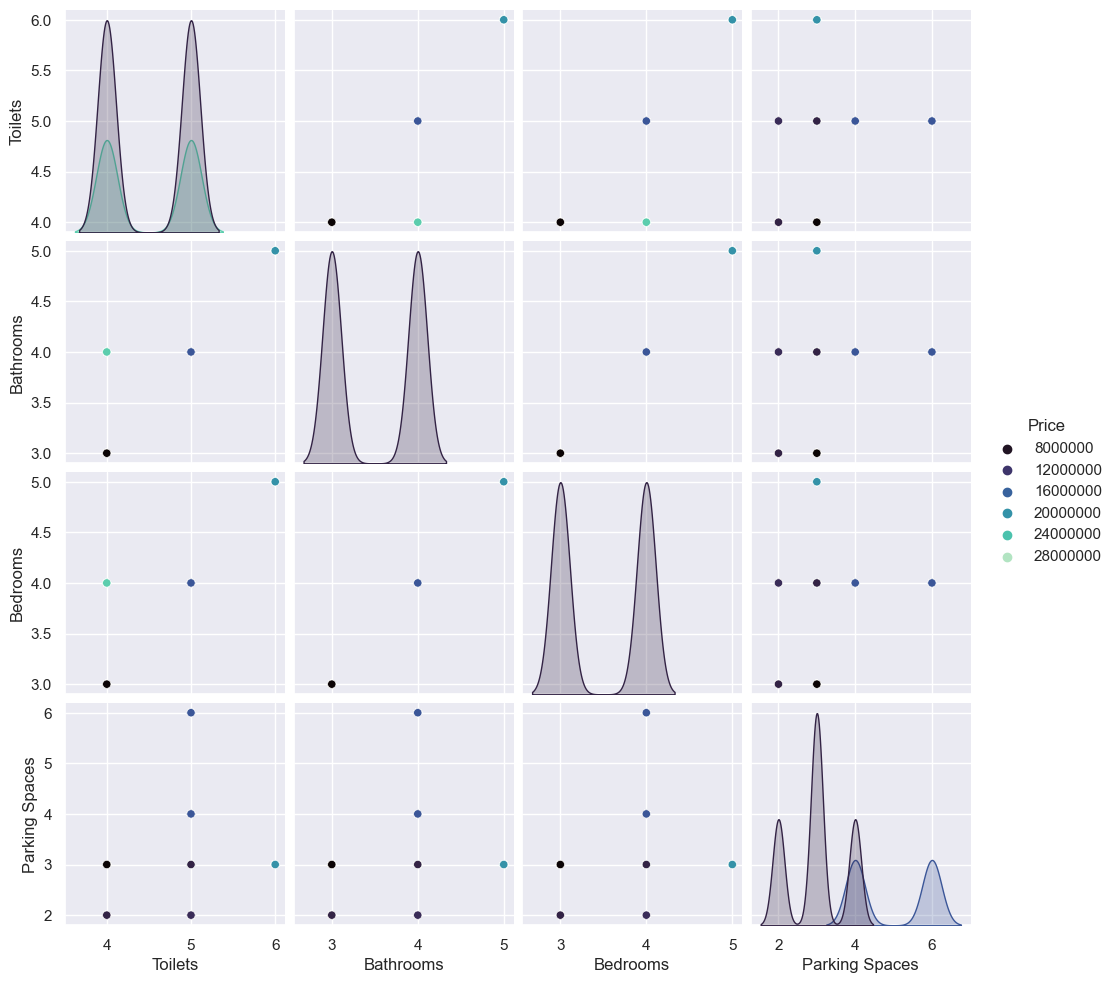

In [9]:


sns.pairplot(data[['Toilets', 'Bathrooms', 'Bedrooms','Parking Spaces', 'Price']], palette='mako',hue='Price');

In [10]:
house_comparison_1 = data[data['Price']>3000000].groupby('HouseType').count()['Price'] 

<Axes: xlabel='HouseType'>

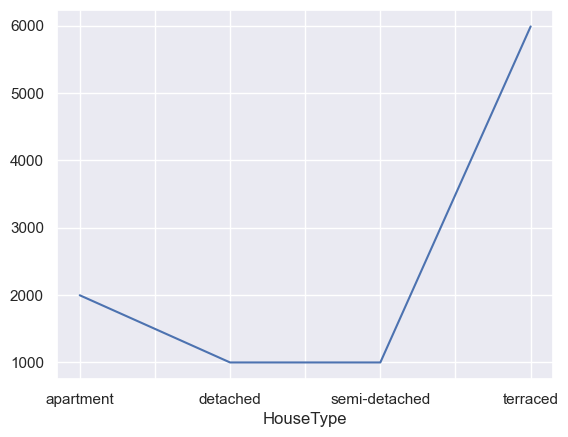

In [11]:
house_comparison_1.plot()

In [12]:
cols = ['Bedrooms','Bathrooms','Toilets','Parking Spaces']

### Observing the correlation between the numerical features

In [13]:
correlation = data[cols].corr()
correlation

,Bedrooms,Bathrooms,Toilets,Parking Spaces
Bedrooms,1.000000,1.000000,0.924733,0.196818
Bathrooms,1.000000,1.000000,0.924733,0.196818
Toilets,0.924733,0.924733,1.000000,0.196818
Parking Spaces,0.196818,0.196818,0.196818,1.000000


#### There's a high correlation among features  which kinda makes sense. The higher the bedrooms, the higher demand in Bathrooms, toilets and parking spaces and visa versa. Bear in mind that correlations in rare situations does not cause causality. 

<Axes: >

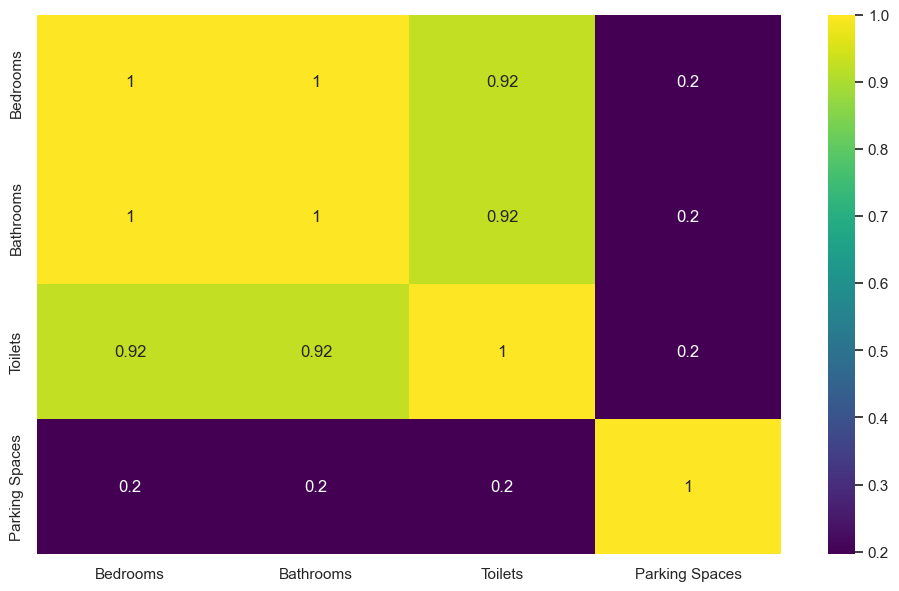

In [14]:
plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot = True,cmap= 'viridis')

#### Exploring the correlation between my features to  the label

In [15]:
colx = ['Bedrooms','Bathrooms','Toilets','Parking Spaces','Price']

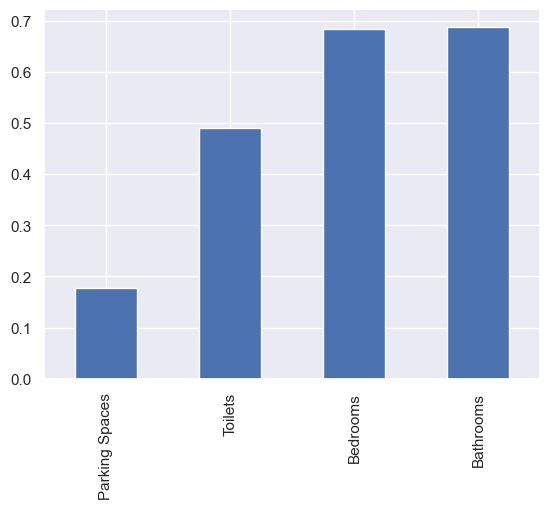

In [16]:
data[colx].corr()['Price'].sort_values().drop('Price').plot(kind ='bar');


##### When i observed the pairwise relationship between my numerical features and my target i denoted i would likely have a good model. Interestingly, the correlation matrix between features and target says likewise; Given that higher correlation between predictor (independent) variables and the target (dependent) variable is generally a good indicator that those predictors will be useful in a model. However, i need to observe  and put  Several other factors into consideration like: 


- Correlation and Causation 
- Multicollinearity
- overfitting 
- model complexity 
- Residual analysis
- performance metrics

# SECTION 2: DATA PREPROCESSING

#### A critical section where i have to wrangle my data carefully before feeding to my model to learn patterns

In [17]:
data.head(2)

,Price,HouseType,Bedrooms,Bathrooms,Toilets,Parking Spaces
0,12000000,terraced,4.0,4.0,5.0,NaN
1,25000000,terraced,4.0,4.0,5.0,3.0


In [18]:
# Making sure the right dataType was assigned to each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           9980 non-null   int64  
 1   HouseType       9980 non-null   object 
 2   Bedrooms        9980 non-null   float64
 3   Bathrooms       9481 non-null   float64
 4   Toilets         9481 non-null   float64
 5   Parking Spaces  5988 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 467.9+ KB


In [19]:
# Observe the decriptive statistics of the data

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,9980.0,1.380000e+07,6.201923e+06,6000000.0,10000000.00,12000000.0,15000000.00,30000000.0
Bedrooms,9980.0,3.900000e+00,5.385435e-01,3.0,4.00,4.0,4.00,5.0
Bathrooms,9481.0,3.894737e+00,5.520338e-01,3.0,4.00,4.0,4.00,5.0
Toilets,9481.0,4.842105e+00,5.861114e-01,4.0,4.00,5.0,5.00,6.0
Parking Spaces,5988.0,3.166667e+00,1.067276e+00,2.0,2.75,3.0,3.25,6.0


In [20]:
data.shape

(9980, 6)

#### OUTLIERS CHECK

In [21]:
data.columns

Index(['Price', 'HouseType', 'Bedrooms', 'Bathrooms', 'Toilets',
       'Parking Spaces'],
      dtype='object')

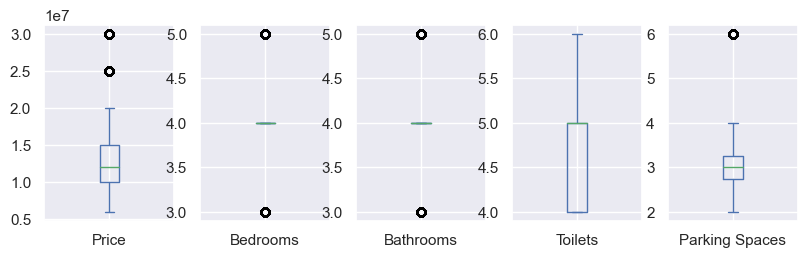

In [22]:
colls = ['Price', 'Bedrooms', 'Bathrooms',
       'Toilets', 'Parking Spaces']

data[colls].plot(
     kind = 'box',
    subplots = True,
    figsize =(60,30),
    layout = (10,30) 
);

####### CALCULATIION FOR OUTLIERS

In [23]:
# checking outliers in price

q75,q25 = np.percentile(data['Price'],[75,25])

In [24]:
iqr = q75 - q25

In [25]:
iqr

5000000.0

In [26]:
lower_limit = q25 - 1.5 * (iqr)

lower_limit

2500000.0

In [27]:
upper_limit = q75 + 1.5 * (iqr)

upper_limit

22500000.0

##### There are outliers  in price

### Exploring the price and parking space variables further

In [28]:
# checking outliers in parking space

IQR = 3.25 - 2.75
lower_lim = 2.75 - 1.5 * (IQR)

lower_lim

2.0

In [29]:
IQR = 3.25 - 2.75
upper_lim = 3.25 + 1.5 * (IQR)

upper_lim

4.0

#### There's  outlier in parking space

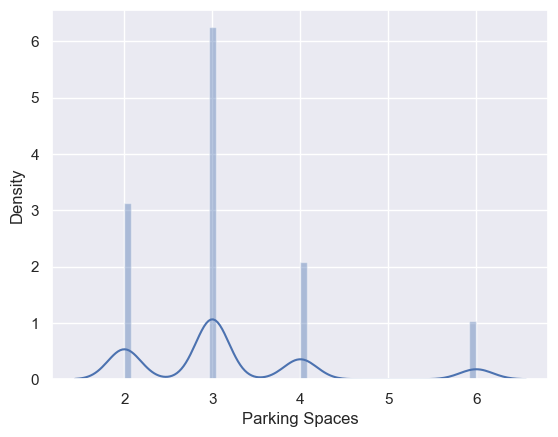

In [30]:
sns.distplot(data['Parking Spaces']);

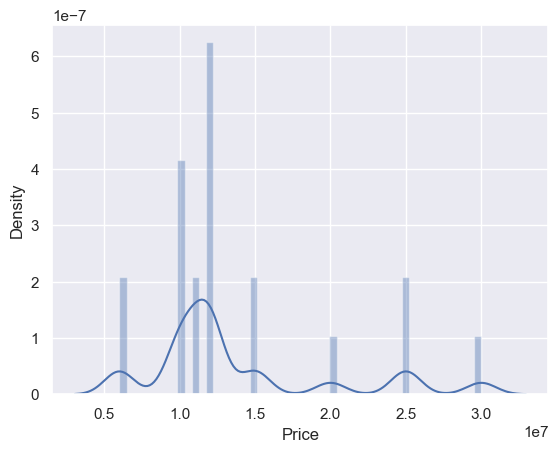

In [31]:
sns.distplot(data['Price']);

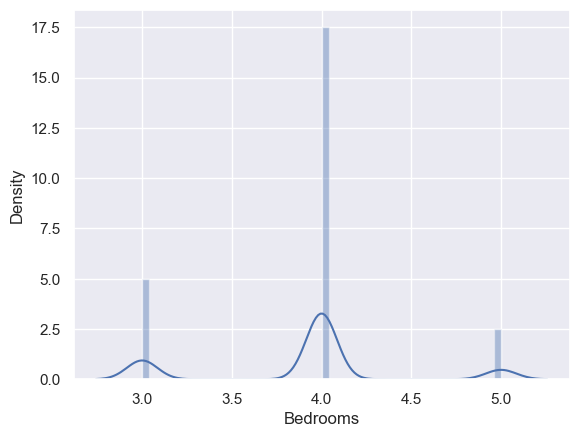

In [32]:
sns.distplot(data['Bedrooms']);

In [33]:
colss = ['Price', 'Bedrooms', 'Bathrooms', 'Toilets',
       'Parking Spaces']

In [34]:
correlations = data[colss].corr()['Price']
correlations

Price             1.000000
Bedrooms          0.682702
Bathrooms         0.687688
Toilets           0.490618
Parking Spaces    0.176821
Name: Price, dtype: float64

### EXploring scatter plot to check for outliers in price with corelated features

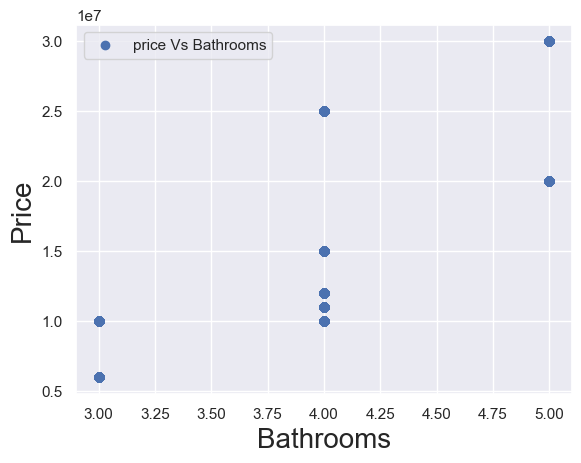

In [35]:
plt.scatter(data = data, x ='Bathrooms',y= 'Price', label = 'price Vs Bathrooms' )
plt.xlabel('Bathrooms', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend()
plt.show;

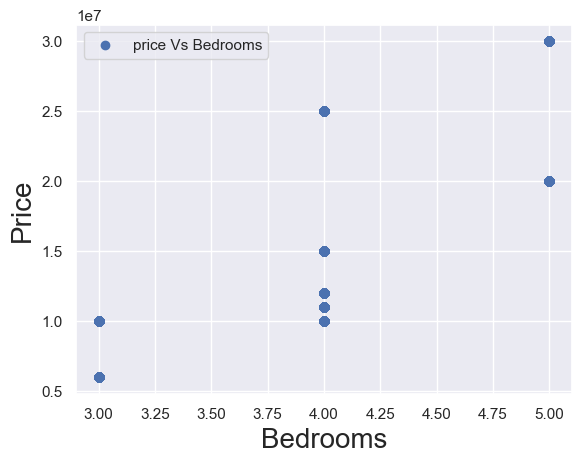

In [36]:
plt.scatter(data = data, x ='Bedrooms',y= 'Price', label = 'price Vs Bedrooms' )
plt.xlabel('Bedrooms', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend()
plt.show;

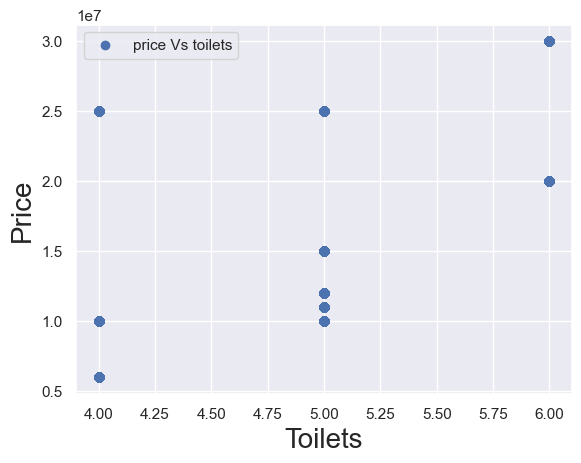

In [37]:
plt.scatter(data = data, x ='Toilets',y= 'Price', label = 'price Vs toilets' )
plt.xlabel('Toilets', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend()
plt.show;

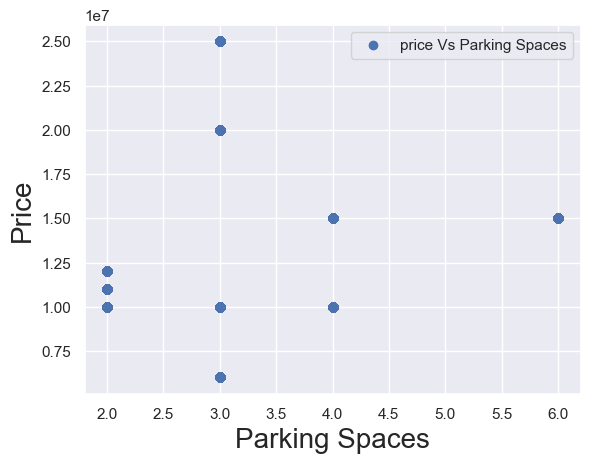

In [38]:
plt.scatter(data = data, x ='Parking Spaces',y= 'Price', label = 'price Vs Parking Spaces' )
plt.xlabel('Parking Spaces', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend()
plt.show;

### Dealing with outliers in the price and parking space colums

In [39]:
data_no_outlier =  data[(data['Price']<22500000)& (data['Price']>4999999)]

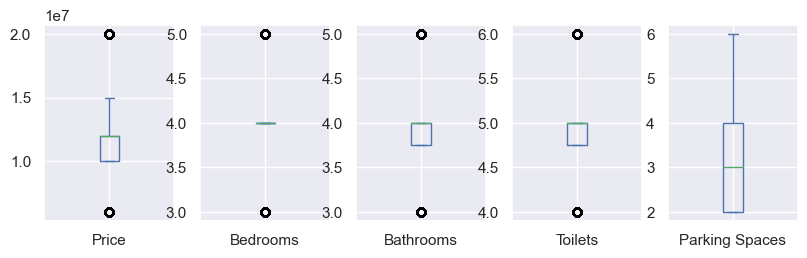

In [40]:
colls = ['Price', 'Bedrooms', 'Bathrooms',
       'Toilets', 'Parking Spaces']

data_no_outlier[colls].plot(
     kind = 'box',
    subplots = True,
    figsize =(60,30),
    layout = (10,30) 
);

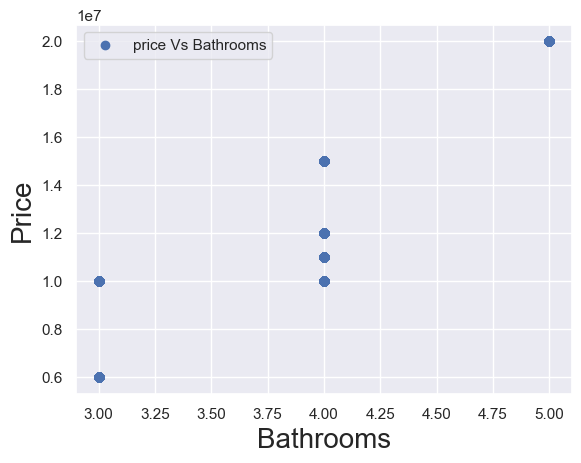

In [41]:
plt.scatter(data = data_no_outlier, x ='Bathrooms',y= 'Price', label = 'price Vs Bathrooms' )
plt.xlabel('Bathrooms', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend()
plt.show;

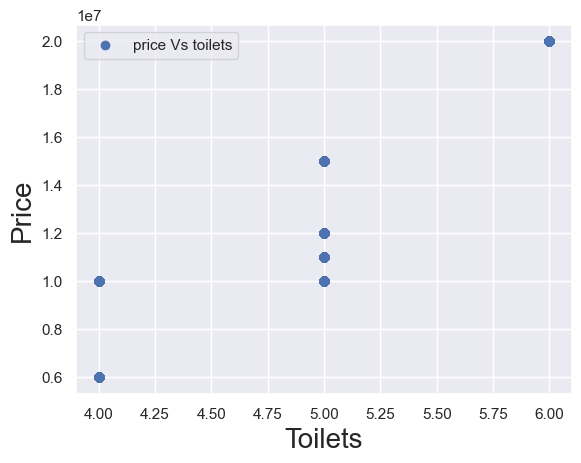

In [42]:
plt.scatter(data = data_no_outlier, x ='Toilets',y= 'Price', label = 'price Vs toilets' )
plt.xlabel('Toilets', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.legend()
plt.show;

#### Nb:  Another  method of dealing with outliers seamslessly is to remove top 1% observations. 

### MISSING VALUES CHECK

- Handling missing values

In [43]:
data_no_outlier.isna().sum()

Price                0
HouseType            0
Bedrooms             0
Bathrooms          499
Toilets            499
Parking Spaces    2994
dtype: int64

- GETTING THE PERCENTAGE OF MISSING ROWS

In [44]:
100 * (data_no_outlier.isna().sum() / len(data_no_outlier))

Price              0.000000
HouseType          0.000000
Bedrooms           0.000000
Bathrooms          5.882353
Toilets            5.882353
Parking Spaces    35.294118
dtype: float64

In [45]:
def percentage_missing(data_no_outlier):
    percent_nan = 100 * (data_no_outlier.isna().sum() / len(data_no_outlier))
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [46]:
percent_nan = percentage_missing(data_no_outlier)

In [47]:
percent_nan 

Bathrooms          5.882353
Toilets            5.882353
Parking Spaces    35.294118
dtype: float64

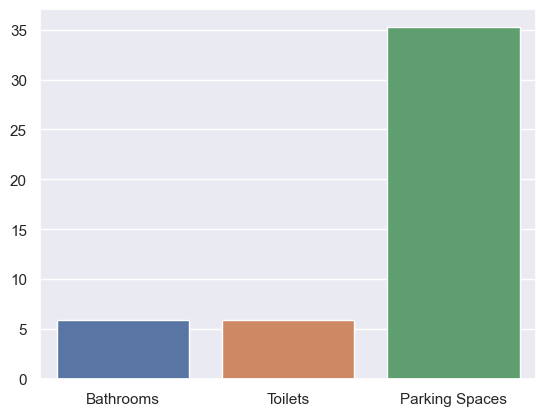

In [48]:
sns.barplot(x = percent_nan.index,y = percent_nan);

#### Since we have more than 10% missing data in parking space column , we  cant possibly drop rows with missing values yet. let's explore to find a better solution for the missing rows. its either we dropna in rows/column or fill the missing rows/column with a mean of correlated feature.

## Observating the missing values in each features

In [49]:
nan_rows = data_no_outlier[[ 'Bathrooms', 'Toilets','Parking Spaces']].isna().any(axis=1)

In [50]:
df_with_nan = data_no_outlier[nan_rows][[ 'Bathrooms', 'Toilets','Parking Spaces']]
df_with_nan

,Bathrooms,Toilets,Parking Spaces
0,4.0,5.0,NaN
3,4.0,5.0,NaN
7,4.0,5.0,NaN
10,4.0,5.0,NaN
16,4.0,5.0,NaN
...,...,...,...
9963,4.0,5.0,NaN
9967,4.0,5.0,NaN
9970,4.0,5.0,NaN
9976,4.0,5.0,NaN


In [51]:
Bathroom_nan = data_no_outlier[data_no_outlier['Bathrooms'].isna()]
Bathroom_nan


,Price,HouseType,Bedrooms,Bathrooms,Toilets,Parking Spaces
17,12000000,terraced,4.0,NaN,NaN,NaN
37,12000000,terraced,4.0,NaN,NaN,NaN
57,12000000,terraced,4.0,NaN,NaN,NaN
77,12000000,terraced,4.0,NaN,NaN,NaN
97,12000000,terraced,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...
9897,12000000,terraced,4.0,NaN,NaN,NaN
9917,12000000,terraced,4.0,NaN,NaN,NaN
9937,12000000,terraced,4.0,NaN,NaN,NaN
9957,12000000,terraced,4.0,NaN,NaN,NaN


#### It makes sense the dropna in the bathroom column since the NAN  goes accross toilet and parking space 

In [52]:
data_cleaned = data_no_outlier.dropna(subset=['Bathrooms'])

In [53]:
data_cleaned

,Price,HouseType,Bedrooms,Bathrooms,Toilets,Parking Spaces
0,12000000,terraced,4.0,4.0,5.0,NaN
3,12000000,semi-detached,4.0,4.0,5.0,NaN
4,12000000,terraced,4.0,4.0,5.0,2.0
5,10000000,apartment,4.0,4.0,5.0,4.0
6,10000000,terraced,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...
9973,11000000,terraced,4.0,4.0,5.0,2.0
9975,6000000,terraced,3.0,3.0,4.0,3.0
9976,12000000,terraced,4.0,4.0,5.0,NaN
9978,6000000,terraced,3.0,3.0,4.0,3.0


In [54]:
percent_nan = percentage_missing(data_cleaned)

In [55]:
percent_nan

Parking Spaces    31.25
dtype: float64

In [56]:
parking_nan = data_cleaned[data_cleaned['Parking Spaces'].isna()]
parking_nan

,Price,HouseType,Bedrooms,Bathrooms,Toilets,Parking Spaces
0,12000000,terraced,4.0,4.0,5.0,NaN
3,12000000,semi-detached,4.0,4.0,5.0,NaN
7,12000000,terraced,4.0,4.0,5.0,NaN
10,11000000,terraced,4.0,4.0,5.0,NaN
16,12000000,terraced,4.0,4.0,5.0,NaN
...,...,...,...,...,...,...
9960,12000000,terraced,4.0,4.0,5.0,NaN
9963,12000000,semi-detached,4.0,4.0,5.0,NaN
9967,12000000,terraced,4.0,4.0,5.0,NaN
9970,11000000,terraced,4.0,4.0,5.0,NaN


#####  This is different, parking space column has the missing nan and dropna would lead to loss of data. i need to fillna 

In [57]:
colss = ['Bedrooms','Bathrooms','Toilets','Parking Spaces']

In [58]:
corr  = data[colss].corr()
corr

,Bedrooms,Bathrooms,Toilets,Parking Spaces
Bedrooms,1.000000,1.000000,0.924733,0.196818
Bathrooms,1.000000,1.000000,0.924733,0.196818
Toilets,0.924733,0.924733,1.000000,0.196818
Parking Spaces,0.196818,0.196818,0.196818,1.000000


#### filling the nan with the mean of the most highly correlated feature to parking space. from the correlation matrix,  any feature is is not so highly correlated to parking space 

In [59]:
data_cleaned.groupby('Bedrooms')['Parking Spaces'].mean()

Bedrooms
3.0    2.75
4.0    3.50
5.0    3.00
Name: Parking Spaces, dtype: float64

In [60]:
data_cleaned['Parking Spaces'] = data_cleaned.groupby('Bedrooms')['Parking Spaces'].transform(lambda value: value.fillna(value.mean()))

In [61]:
data_cleaned

,Price,HouseType,Bedrooms,Bathrooms,Toilets,Parking Spaces
0,12000000,terraced,4.0,4.0,5.0,3.5
3,12000000,semi-detached,4.0,4.0,5.0,3.5
4,12000000,terraced,4.0,4.0,5.0,2.0
5,10000000,apartment,4.0,4.0,5.0,4.0
6,10000000,terraced,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...
9973,11000000,terraced,4.0,4.0,5.0,2.0
9975,6000000,terraced,3.0,3.0,4.0,3.0
9976,12000000,terraced,4.0,4.0,5.0,3.5
9978,6000000,terraced,3.0,3.0,4.0,3.0


In [62]:
data_cleaned.isna().sum()

Price             0
HouseType         0
Bedrooms          0
Bathrooms         0
Toilets           0
Parking Spaces    0
dtype: int64

###### NAN  HAS BEEN SUCCESSFULLY CLEANED

In [63]:
data_preprocessed = data_cleaned.copy()

In [64]:
data_preprocessed

,Price,HouseType,Bedrooms,Bathrooms,Toilets,Parking Spaces
0,12000000,terraced,4.0,4.0,5.0,3.5
3,12000000,semi-detached,4.0,4.0,5.0,3.5
4,12000000,terraced,4.0,4.0,5.0,2.0
5,10000000,apartment,4.0,4.0,5.0,4.0
6,10000000,terraced,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...
9973,11000000,terraced,4.0,4.0,5.0,2.0
9975,6000000,terraced,3.0,3.0,4.0,3.0
9976,12000000,terraced,4.0,4.0,5.0,3.5
9978,6000000,terraced,3.0,3.0,4.0,3.0


In [65]:
X = data_preprocessed.drop(['Price'], axis = 1)
y = data_preprocessed['Price']

### train-test-split, reset index, feature scale on x_train, x_test to avoid overfitting

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## One hot encoding on categorical features

In [68]:
X_train_dummies = pd.get_dummies(X_train,dtype = int, drop_first = True)
X_test_dummies =  pd.get_dummies(X_test,dtype = int, drop_first = True)

In [69]:
X_test_dummies

,Bedrooms,Bathrooms,Toilets,Parking Spaces,HouseType_detached,HouseType_semi-detached,HouseType_terraced
6267,4.0,4.0,5.0,3.5,0,0,1
1319,4.0,4.0,5.0,6.0,1,0,0
5015,3.0,3.0,4.0,3.0,0,0,1
2165,4.0,4.0,5.0,4.0,0,0,0
7685,4.0,4.0,5.0,4.0,0,0,0
...,...,...,...,...,...,...,...
9932,4.0,4.0,5.0,4.0,0,0,0
2910,4.0,4.0,5.0,3.5,0,0,1
1972,4.0,4.0,5.0,4.0,0,0,0
6916,4.0,4.0,5.0,3.5,0,0,1


In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

In [72]:
scaler.fit(X_train_dummies)

MinMaxScaler()

In [73]:
x_train_scaled = scaler.transform(X_train_dummies)
x_test_scaled = scaler.transform(X_test_dummies)

### Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lr = LinearRegression()

In [174]:
linear_model = lr.fit(x_train_scaled, y_train)

In [175]:
y_pred = linear_model.predict(x_test_scaled)

In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [158]:
lr_mae = mean_absolute_error(y_test,y_pred)
lr_mae

941087.955926974

In [159]:
lr_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
lr_rmse

1251969.1737544641

In [177]:
# R-SQUARED

linear_model.score(x_train_scaled,y_train)

0.8543779921772034

In [83]:
test_residual = y_test - y_pred

In [84]:
test_residual

6267    9.797633e+05
1319   -5.185514e+03
5015   -1.677753e+05
2165   -3.324798e+06
7685   -3.324798e+06
            ...     
9932    1.675202e+06
2910   -2.023669e+04
1972    1.675202e+06
6916    9.797633e+05
5604   -7.245240e+04
Name: Price, Length: 1597, dtype: float64

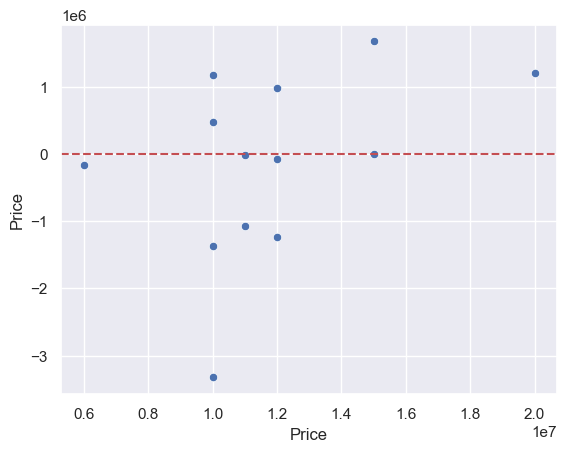

In [85]:
sns.scatterplot(x= y_test, y = test_residual)
plt.axhline(y = 0,color = 'r',ls = '--')

## POLYNOMIAL REGRESSION

In [86]:
features = data_preprocessed.drop(['Price'], axis = 1)
target= data_preprocessed['Price']

In [87]:
from sklearn.preprocessing import PolynomialFeatures

In [88]:
polynomial_converter = PolynomialFeatures(degree = 2,include_bias = False )

In [137]:
polynomial_converter.fit(X_train_dummies)

PolynomialFeatures(include_bias=False)

In [140]:
train_poly = polynomial_converter.transform(X_train_dummies)
test_poly= polynomial_converter.transform(X_test_dummies)

In [141]:
train_poly[0]

array([ 3.,  3.,  4.,  3.,  0.,  0.,  0.,  9.,  9., 12.,  9.,  0.,  0.,
        0.,  9., 12.,  9.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  9.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [142]:
X_train_dummies.iloc[0]

Bedrooms                   3.0
Bathrooms                  3.0
Toilets                    4.0
Parking Spaces             3.0
HouseType_detached         0.0
HouseType_semi-detached    0.0
HouseType_terraced         0.0
Name: 3631, dtype: float64

In [182]:
Linear = LinearRegression()

In [183]:
poly_model = Linear.fit(train_poly,y_train)

In [184]:
poly_pred = poly_model.predict(test_poly)

In [185]:
poly_mae = mean_absolute_error(y_test,poly_pred)
poly_mae

480021.2097683156

In [186]:
poly_rmse = np.sqrt(mean_squared_error(y_test,poly_pred))
poly_rmse

939061.2642245062

In [187]:
# R-SQUARED

poly_model.score(train_poly,y_train)

0.9180368027203882

In [97]:
poly_residual = y_test - poly_pred

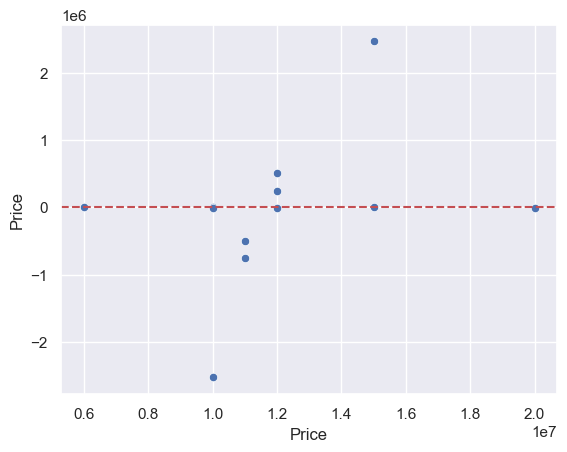

In [98]:
sns.scatterplot(x= y_test, y = poly_residual)
plt.axhline(y = 0,color = 'r',ls = '--')

In [ ]:
#### EXPLORING VARIOUS DEGREES

In [155]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,5):
    
    
    poly_converter = PolynomialFeatures(degree = 2,include_bias = False )
    
    poly_converter.fit(X_train_dummies )    
    train_polynomial = poly_converter.transform(X_train_dummies)
    test_polynomial = poly_converter.transform(X_test_dummies )
    
    polynomial_model = lr.fit(train_polynomial,y_train)
    
    
    
    
    train_pred = polynomial_model.predict(train_polynomial)
    test_pred = polynomial_model.predict(test_polynomial)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
        
    train_rmse_errors.append(train_rmse) 
          
    test_rmse_errors.append(test_rmse) 
        
    

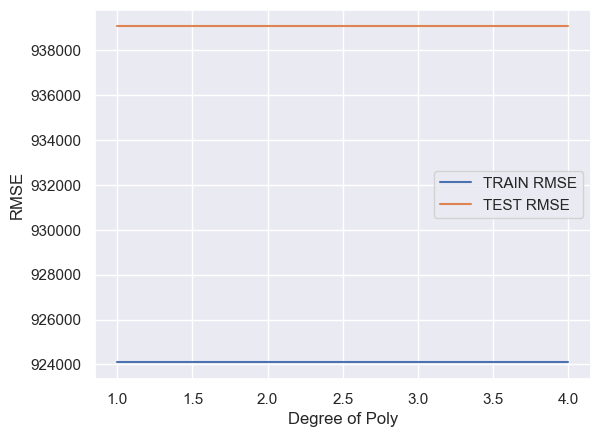

In [156]:
plt.plot(range(1,5),train_rmse_errors[:5],label = 'TRAIN RMSE')
plt.plot(range(1,5),test_rmse_errors[:5],label = 'TEST RMSE')

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend();

####  Elastic Net Regression is a type of regularized linear regression that combines the penalties of both the Lasso (L1) and Ridge (L2) regression methods. from the ratio of my model. lassio performed better than ridge regression

### L1 AND L2 REGULARIZATION -- ELASTIC NET

In [118]:
from sklearn.linear_model import ElasticNetCV

In [119]:
elastic_model = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1],eps = 0.001,n_alphas = 100,max_iter = 1000000)

In [120]:
elastic_model.fit(x_train_scaled, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [121]:
elastic_model.l1_ratio_

1.0

In [122]:
elastic_model.alpha_

716.1195622792285

In [123]:
lasso_cv_model.alpha_

716.1195622792285

In [125]:
elasticnet_predict = elastic_model.predict(x_test_scaled)

In [163]:
elastic_mae = mean_absolute_error(y_test,elasticnet_predict)
elastic_mae

944073.7495592403

In [164]:
elastic_rmse = np.sqrt(mean_squared_error(y_test,elasticnet_predict))
elastic_rmse

1252401.760057289

In [178]:
# R-SQUARED

elastic_model.score(x_train_scaled, y_train)

0.8543824178206666

### L1 REGULARIZATION LASSO CROSS VALIDATION

In [148]:
from sklearn.linear_model import LassoCV

In [149]:
lasso_cv_model = LassoCV(eps = 0.001,n_alphas = 100,cv = 5, max_iter = 1000000)

In [150]:
lasso_cv_model.fit(x_train_scaled, y_train)

LassoCV(cv=5, max_iter=1000000)

In [151]:
lasso_predict = lasso_cv_model.predict(x_test_scaled)

In [153]:
lasso_cv_model.alpha_

716.1195622792285

In [154]:
mean_absolute_error(y_test,lasso_predict)

944073.7495592403

In [152]:
np.sqrt(mean_squared_error(y_test,lasso_predict))

1252401.760057289

### L2 REGULARIZATION RIDGE CROSS VALIDATION

In [ ]:
from sklearn.linear_model import RidgeCV 

In [ ]:
from sklearn.metrics import SCORERS

In [ ]:
SCORERS.keys()

In [ ]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring = 'neg_mean_absolute_error')

In [ ]:
ridge_cv_model.fit(x_train_scaled,y_train)

In [ ]:
ridge_predict = ridge_cv_model.predict(x_test_scaled)

In [ ]:
mean_absolute_error(y_test,ridge_predict)

In [ ]:
np.sqrt(mean_squared_error(y_test,ridge_predict))

In [192]:
## The mean of my target( HOUSE_PRICE)


target_mean = data_preprocessed['Price'].mean()
target_mean

11500000.0

#### Given that the mean house price is ₦11,500,000, the Polynomial Regression model's MAE and RMSE are relatively low (4.17% and 8.16%, respectively), suggesting it is a good model for your predictions. The errors for Linear Regression and ElasticNet regression are higher (around 8-11%), which might still be acceptable but are less optimal compared to Polynomial Regression.

In [190]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

model_summary = pd.DataFrame(
{
    'Models':[
        'Linear Regression',
        'Polynomial Regression',
        'ElasticNet regression'
     
    ],
    
    'MAE':[
       mean_absolute_error(y_test,y_pred),
      mean_absolute_error(y_test,poly_pred),    
      mean_absolute_error(y_test,elasticnet_predict)
    
    ],
    
    'RMSE':[
        
       np.sqrt(mean_squared_error(y_test,y_pred)),
       np.sqrt(mean_squared_error(y_test,poly_pred)),    
       np.sqrt(mean_squared_error(y_test,elasticnet_predict))
      
    ],
    
      'R-SQUARED':[
        
      linear_model.score(x_train_scaled,y_train),
      poly_model.score(train_poly,y_train),    
      elastic_model.score(x_train_scaled, y_train)
      
    ],
    
    'Relative MAE':[
       lr_mae / target_mean,
       poly_mae / target_mean,    
      elastic_mae / target_mean
    
    ],
  
     'Relative RMSE':[
       lr_rmse / target_mean,
       poly_rmse / target_mean,    
      elastic_rmse / target_mean
    
    ],
    
} 
)

In [191]:
model_summary

,Models,MAE,RMSE,R-SQUARED,Relative MAE,Relative RMSE
0,Linear Regression,941087.955927,1.251969e+06,0.854378,0.081834,0.108867
1,Polynomial Regression,480021.209768,9.390613e+05,0.918037,0.041741,0.081658
2,ElasticNet regression,944073.749559,1.252402e+06,0.854382,0.082093,0.108905


##### Based on the performance metrics, Polynomial Regression is the best model for predicting house prices. It provides the most accurate predictions with the least error and explains a higher percentage of variance in house prices. Linear Regression and ElasticNet Regression perform similarly but are less accurate. When accuracy is critical, Polynomial Regression is the recommended choice

## saving and Preparing my final model, polynomial converter  for deployment

In [194]:
final_poly_converter  = PolynomialFeatures(degree = 2,include_bias = False )

In [195]:
final_model = LinearRegression()

In [196]:
full_converted_xtrain = final_poly_converter.fit_transform(X_train_dummies)

In [197]:
final_model.fit(full_converted_xtrain,y_train)

LinearRegression()

In [199]:
full_converted_xtrain[0]

array([ 3.,  3.,  4.,  3.,  0.,  0.,  0.,  9.,  9., 12.,  9.,  0.,  0.,
        0.,  9., 12.,  9.,  0.,  0.,  0., 16., 12.,  0.,  0.,  0.,  9.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [205]:
from  joblib import dump

In [201]:
joblib.dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [203]:
joblib.dump(final_poly_converter , 'final_converter.joblib')

['final_converter.joblib']

### Testing the saved model

In [204]:
from  joblib import load

In [207]:
loaded_converter = load('final_converter.joblib')
loaded_converter

PolynomialFeatures(include_bias=False)

In [208]:
loaded_model = load('final_poly_model.joblib')
loaded_model

LinearRegression()

In [223]:
 X_train_dummies.iloc[1]

Bedrooms                   4.0
Bathrooms                  4.0
Toilets                    5.0
Parking Spaces             2.0
HouseType_detached         0.0
HouseType_semi-detached    0.0
HouseType_terraced         1.0
Name: 9953, dtype: float64

In [224]:
Data = [[4,4,5,2,0,0,1]]

In [225]:
converted_data = loaded_converter.fit_transform(Data)
converted_data

array([[ 4.,  4.,  5.,  2.,  0.,  0.,  1., 16., 16., 20.,  8.,  0.,  0.,
         4., 16., 20.,  8.,  0.,  0.,  4., 25., 10.,  0.,  0.,  5.,  4.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [226]:
loaded_model.predict(converted_data)

array([11494224.])

In [229]:
y_train.iloc[1]

11000000

#### Saved model and poly  converter working perfectly and fit for deployment 